In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r'C:\Users\HP\Downloads\RAw Ad Data\Raw Advertising Dataset.csv'

# Read the CSV file
data = pd.read_csv(file_path)

In [7]:
print(data.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Let's see how coreelated the variables are

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

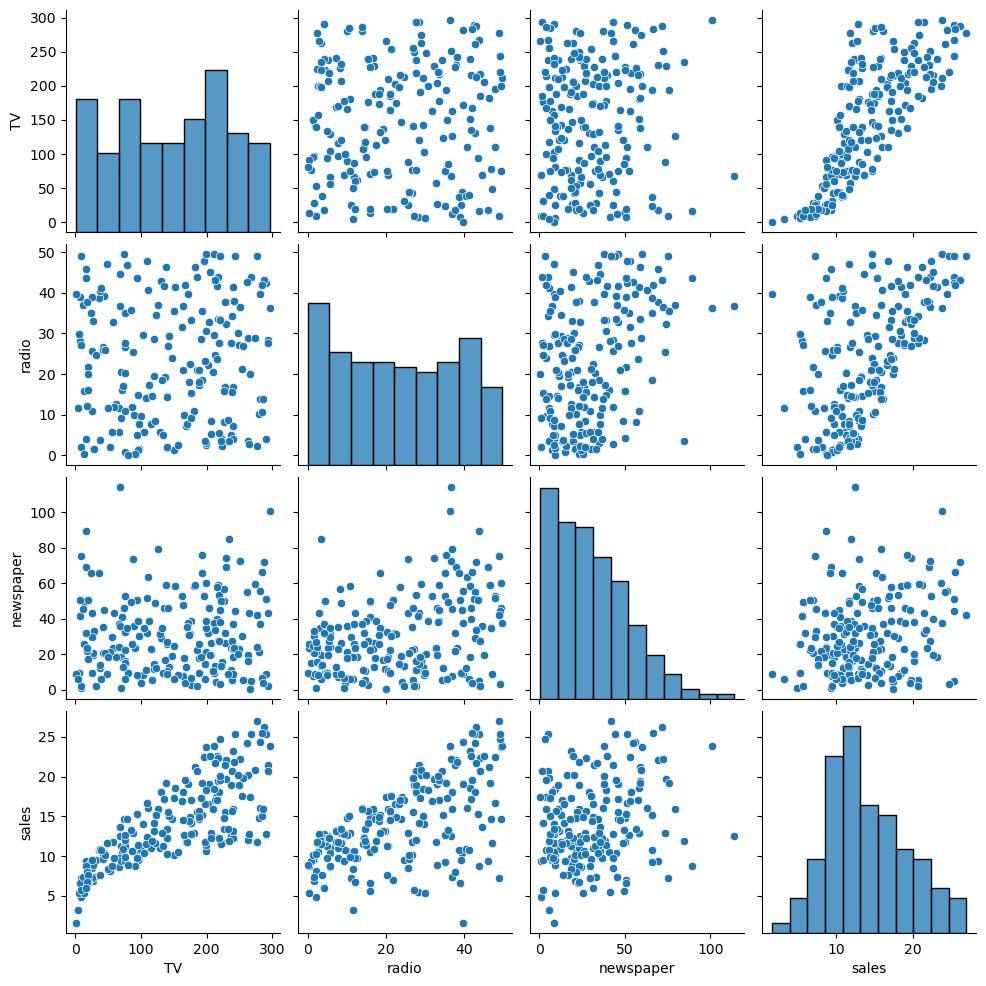

In [14]:
sns.pairplot(data)

In [15]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# From our visuals and our correlatuon results, we sew that TV has a stronger correlation to sales
# Raio is also fairly correlated to sales

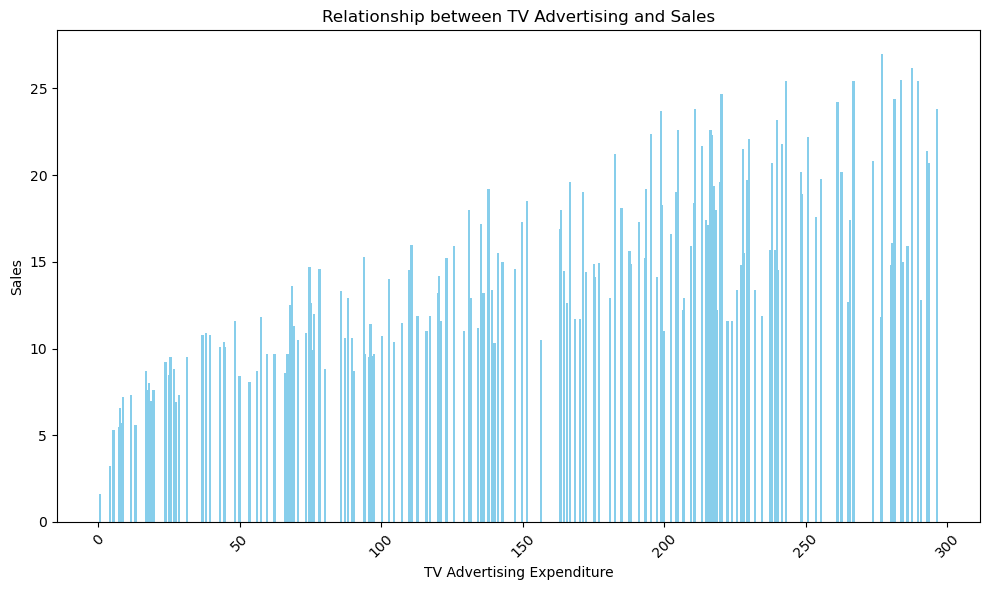

In [238]:
import matplotlib.pyplot as plt

# Grouping data by TV expenditure and calculating mean sales (or any other aggregation)
tv_sales = data.groupby('TV')['sales'].mean().reset_index()

# Sorting values for better visualization
tv_sales = tv_sales.sort_values(by='TV')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(tv_sales['TV'], tv_sales['sales'], color='skyblue')
plt.xlabel('TV Advertising Expenditure')
plt.ylabel('Sales')
plt.title('Relationship between TV Advertising and Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


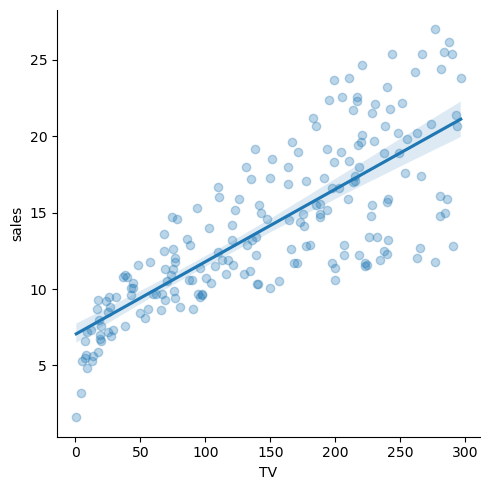

In [71]:
# Plot for 'TV'
sns.lmplot(x='TV',
           y='sales',
           data=data,
           scatter_kws={'alpha': 0.3})

# We see some sort of correlation between the sales and TV columns

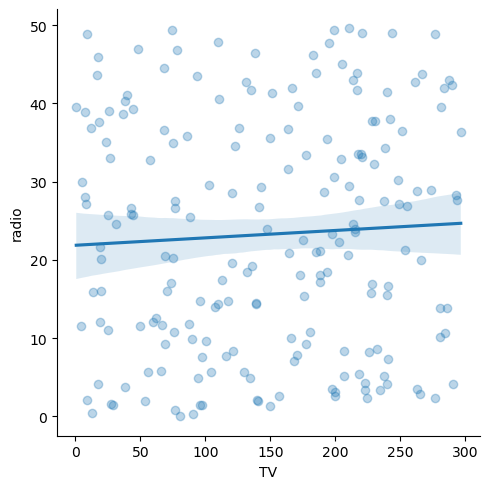

In [200]:
# Plot for 'radio'
sns.lmplot(x='TV',
           y='radio',
           data=data,
           scatter_kws={'alpha': 0.3})

In [ ]:
# We see that there is no linear correlation betwen radio and sales

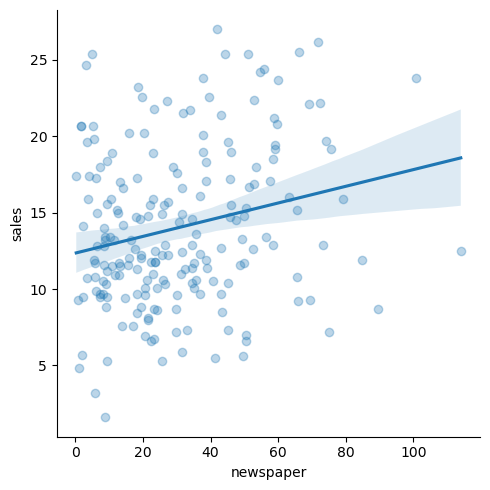

In [204]:
# Plot for 'newspaper'
sns.lmplot(x='newspaper',
           y='sales',
           data=data,
           scatter_kws={'alpha': 0.3})

In [ ]:
# There is a sligh correlation

# Let's build our model

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
X = data['TV']
y = data['sales']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =42)

In [79]:
# Training the data

In [85]:
lm = LinearRegression()

In [89]:
import numpy as np

# Convert X_train and y_train to NumPy arrays
X_train = X_train.values if isinstance(X_train, pd.Series) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

# Reshape X_train if it has a single feature
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

# Reshape y_train if it is not already a 1D array
if y_train.ndim == 2 and y_train.shape[1] == 1:
    y_train = y_train.ravel()

In [210]:
lm.fit(X_train, y_train)

LinearRegression()

In [93]:
lm.coef_

array([0.0464078])

In [95]:
# Predictions

In [103]:
# Convert X_test to a NumPy array if it's a pandas Series
X_test = X_test.values if isinstance(X_test, pd.Series) else X_test

# Reshape X_test if it has a single feature
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)

In [214]:
predictions = lm.predict(X_test)

In [107]:
predictions

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864,
       10.72468577, 17.30067133,  9.55984994, 17.56055502, 15.36546598,
        8.7013056 ,  9.84757831, 18.12208943,  7.49006196, 13.71334823,
       15.13806775,  7.57823679, 16.40964153, 10.73396733, 18.25667206,
       17.89005042, 10.38590882,  9.00295631, 18.88317738, 10.44159818,
        9.72227724, 17.14752559, 13.70406667, 11.28622018,  7.62928537,
       16.5117387 , 10.45087974, 16.46997167,  8.02375169, 20.26612989,
       18.2937983 ,  9.48095667, 19.94127527, 12.67845424,  8.51567439,
       12.62276488, 15.45364081,  9.2396361 , 10.1306659 , 17.63480751,
        9.01223787, 10.51585066, 14.07532908, 12.09371593, 10.78037513,
       10.86854996, 15.05453371,  7.64320771,  7.60144069, 10.78501591,
       13.24462943, 10.64579251, 20.68380011,  8.14905275, 16.40964153])

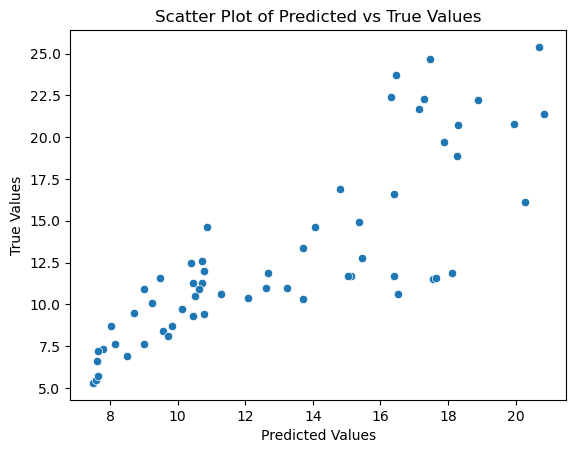

In [109]:
sns.scatterplot(x=predictions, y=y_test)

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs True Values')

# Show the plot
plt.show()

In [111]:
residuals = y_test - predictions

In [113]:
residuals

95     2.082146
15     6.092456
30     0.567695
158   -0.482431
128    7.236901
115    1.875314
69     4.999329
170   -1.159850
174   -6.060555
45    -0.465466
66     0.798694
182   -1.147578
165   -6.222089
78    -2.190062
186   -3.413348
177   -3.438068
56    -2.078237
152    0.190358
82     0.566033
68     0.643328
124    1.809950
16     2.114091
148    1.897044
93     3.316823
65    -1.141598
60    -1.622277
84     4.552474
67    -0.304067
125   -0.686220
132   -1.929285
9     -5.911739
18     0.849120
55     7.230028
75     0.676248
150   -4.166130
104    2.406202
135    2.119043
137    0.858725
164   -0.778454
76    -1.615674
79    -1.622765
197   -2.653641
38     0.860364
24    -0.430666
122   -6.034808
195   -1.412238
29    -0.015851
19     0.524671
143   -1.693716
86     1.219625
114    3.731450
173   -3.354534
5     -0.443208
126   -1.001441
117   -1.385016
73    -2.244629
140    0.254207
98     4.716200
172   -0.549053
96    -4.709642
Name: sales, dtype: float64

In [115]:
import numpy as np
def rmse(y, predictions):
    return np.sqrt(np.mean(np.square(y_test - predictions)))

In [117]:
loss= rmse( y_test, predictions)
print('Loss:', loss)

Loss: 2.995161304907236


In [53]:
# We see that we have just a loss function of approximately 3 which isn't so bad.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


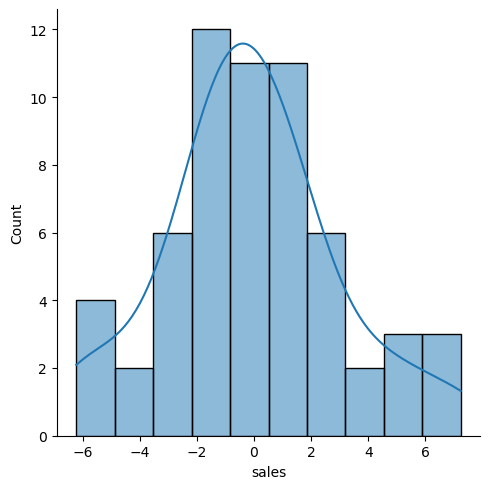

In [119]:
sns.displot(residuals, bins = 10, kde = True)

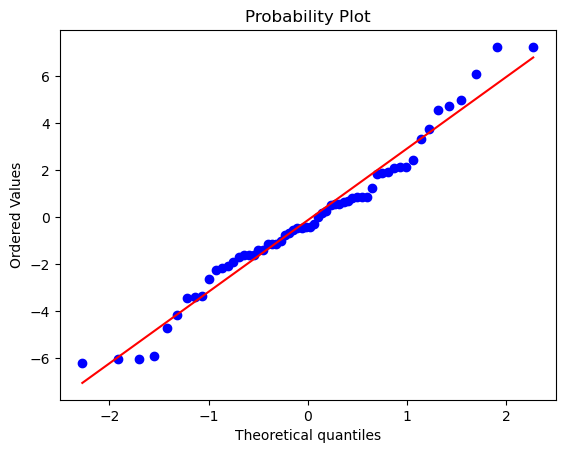

In [121]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# lET'S CHECK FOR OUR MODEL ASSUMPTIONS

In [61]:
# There are 4 major ways to check for linear model assumption
# 1) Linearity
# 2) The Independednt observation assumption states that each observation in the dataset is independent.
# 3) Normality Assumption
# 4) Homoscedasticity

In [ ]:
# Let's check for Linearity first

<Axes: xlabel='TV', ylabel='sales'>

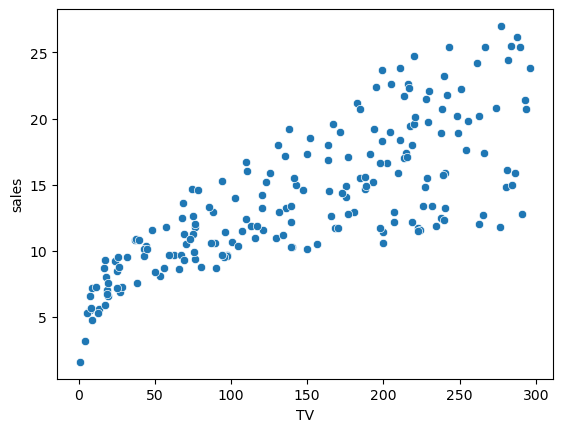

In [142]:
sns.scatterplot(x = data["TV"], y= data["sales"])

In [ ]:
# The graph is somewhat linear.
# Now, let's check othr parameters

<Axes: xlabel='radio', ylabel='sales'>

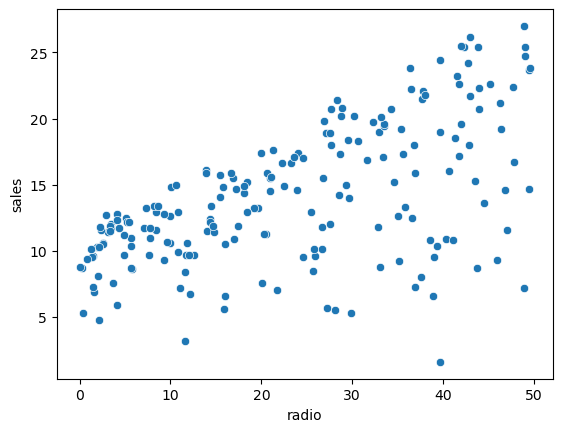

In [144]:
sns.scatterplot(x = data["radio"], y= data["sales"])

In [ ]:
# Thios is a bot more scattered. More reason we didn't use it in fitting our model

<Axes: xlabel='newspaper', ylabel='sales'>

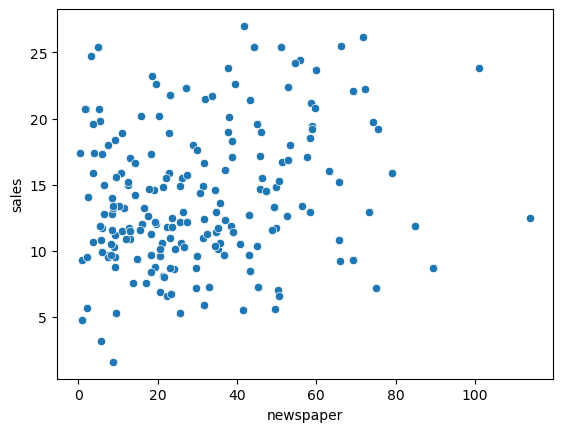

In [146]:
sns.scatterplot(x = data["newspaper"], y= data["sales"])

In [ ]:
# This has no linear correlation whatsoever

In [ ]:
# Let's chck for Independence
# The 'TV' culums is independent of the sales column.
# So this 2 condition has been met

In [ ]:
# Check for Normality assumption.
# The histogram of resdiuals should be approximately distributed


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


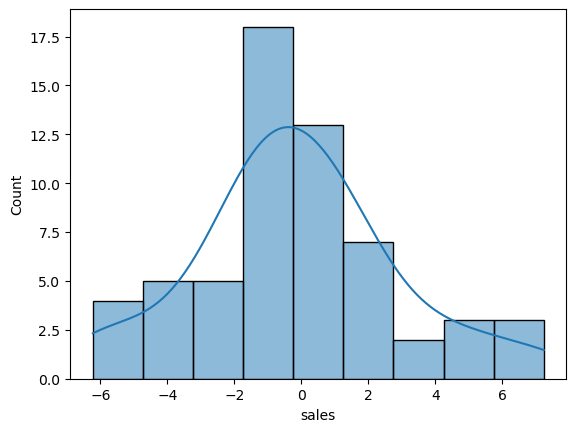

In [150]:
# Create a histogram of the residuals
sns.histplot(residuals, kde=True)

# Display the plot
plt.show()

In [ ]:
# We can see that the residuals are evenly distribuited.
# So we have met 3 conditions right. Remaining one

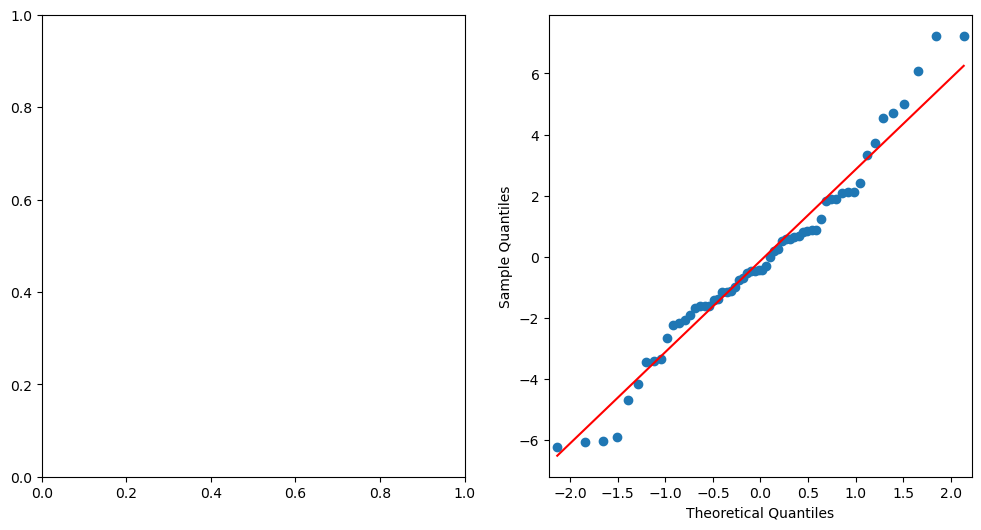

In [178]:
# Let's also get a QQ plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sm.qqplot(residuals, line='s', ax=axes[1])

# Display the plot
plt.show()

In [ ]:
# Check for homoscedasticity

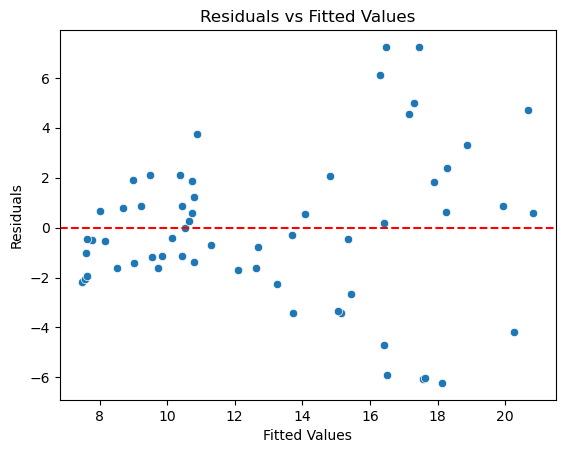

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
fig = sns.scatterplot(x=predictions, y=residuals)

# Add a horizontal line at y=0
plt.axhline(0, color='red', linestyle='--')

# Set labels and title
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Residuals vs Fitted Values")

# Display the plot
plt.show()


In [208]:
# Single prediction value
value = 250

# Reshape the value to be a 2D array with a single sample
value_reshaped = np.array(value).reshape(-1, 1)

# Make the prediction
prediction = lm.predict(value_reshaped)

print(prediction)

[18.84141036]


In [ ]:
# This shows that a budget of $250K for TV asvert would probably give us just about $18K sales
# I personally do not think this is a good investment